# E-coating ultrafiltration maintenance dataset

###### Dataset: https://www.kaggle.com/boyangs444/process-data-for-predictive-maintenance

In [31]:
import numpy as np
import pandas as pd

In [32]:
data_IoT = pd.read_csv('synthetic_predictable_filters.csv')
print(data_IoT.head())
print(data_IoT.tail())

        TP1       FM1       PE1       PE2  Differential_Pressure  \
0  0.108599  0.286515  0.999157  0.995383               0.003774   
1  0.116969  0.300470  1.000390  0.995505               0.004885   
2  0.113320  0.295321  0.999553  0.993847               0.005707   
3  0.119282  0.293970  1.000754  0.994125               0.006629   
4  0.115632  0.000000  1.000564  1.000564               0.000000   

   Hydraulic_Resistance                 TIME  
0              0.013174  2023-01-01 00:00:00  
1              0.016259  2023-01-01 00:30:00  
2              0.019324  2023-01-01 01:00:00  
3              0.022550  2023-01-01 01:30:00  
4              0.010000  2023-01-01 02:00:00  
           TP1       FM1       PE1       PE2  Differential_Pressure  \
4995  0.100250  0.296217  0.998642 -0.443847               1.442489   
4996  0.170070  0.294572  1.000612 -0.454482               1.455093   
4997  0.170994  0.303506  0.998882 -0.521934               1.520816   
4998  0.206366  0.306484 

In [33]:
data_IoT.describe()

,TP1,FM1,PE1,PE2,Differential_Pressure,Hydraulic_Resistance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499344,0.296745,0.999982,0.742589,0.257393,0.858544
std,0.283254,0.032253,0.000994,0.418752,0.418763,1.393989
min,0.051753,0.000000,0.996494,-2.811053,0.000000,0.010000
25%,0.216975,0.292843,0.999304,0.712241,0.032443,0.107717
50%,0.497377,0.299577,0.999981,0.905303,0.094326,0.313010
75%,0.783180,0.306625,1.000663,0.967559,0.287588,0.960163
max,0.946022,0.332575,1.003608,1.002481,3.811983,12.553137


In [34]:
data_IoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TP1                    5000 non-null   float64
 1   FM1                    5000 non-null   float64
 2   PE1                    5000 non-null   float64
 3   PE2                    5000 non-null   float64
 4   Differential_Pressure  5000 non-null   float64
 5   Hydraulic_Resistance   5000 non-null   float64
 6   TIME                   5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [35]:
data_IoT.isnull().sum()

TP1                      0
FM1                      0
PE1                      0
PE2                      0
Differential_Pressure    0
Hydraulic_Resistance     0
TIME                     0
dtype: int64

In [36]:
#Duplicate rows in both datasets
data_IoT.duplicated().sum()
# data_manual.duplicated().sum()

0

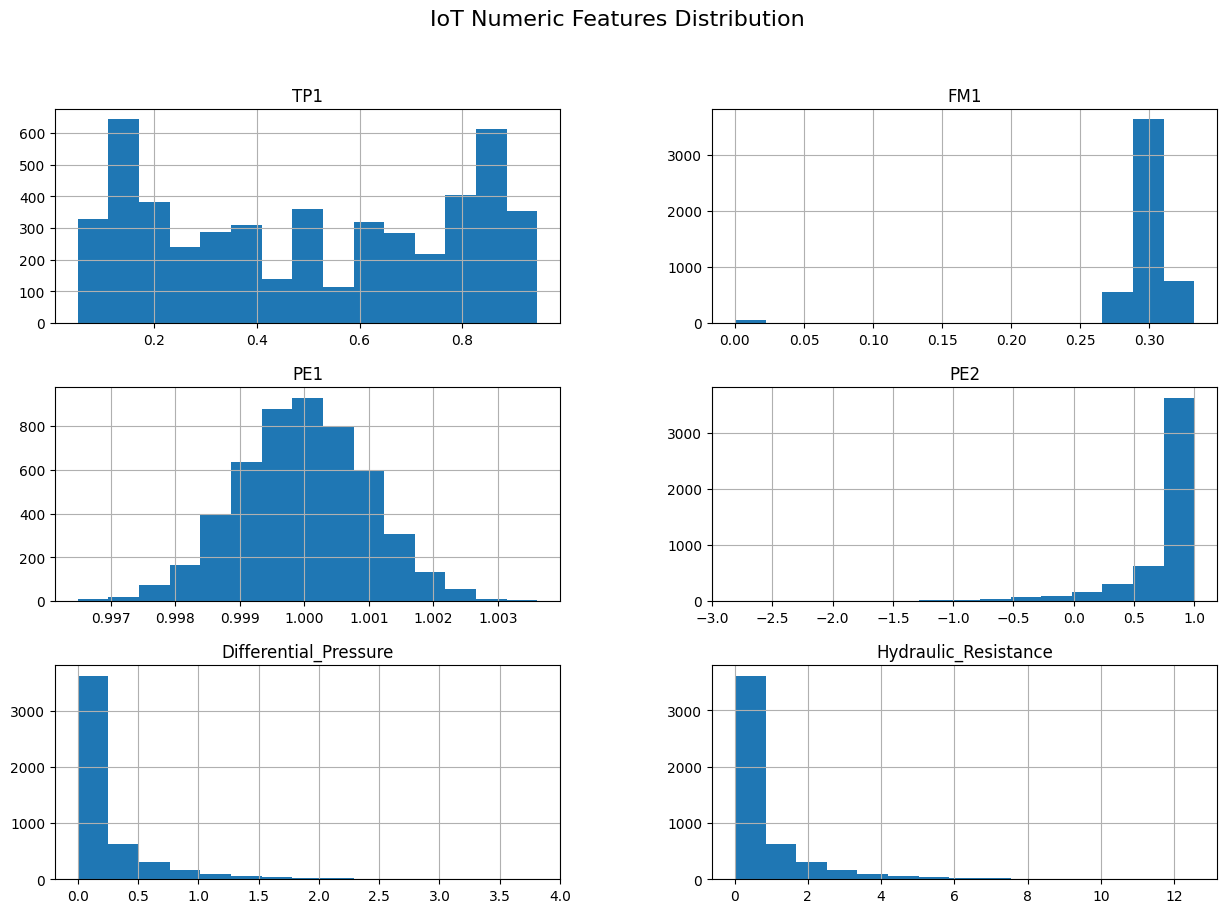

In [37]:
#Visualization of numeric features
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features_IoT = data_IoT.select_dtypes(include=[np.number])
# numeric_features_manual = data_manual.select_dtypes(include=[np.number])
numeric_features_IoT.hist(bins=15, figsize=(15, 10))
plt.suptitle('IoT Numeric Features Distribution', fontsize=16)
plt.show()

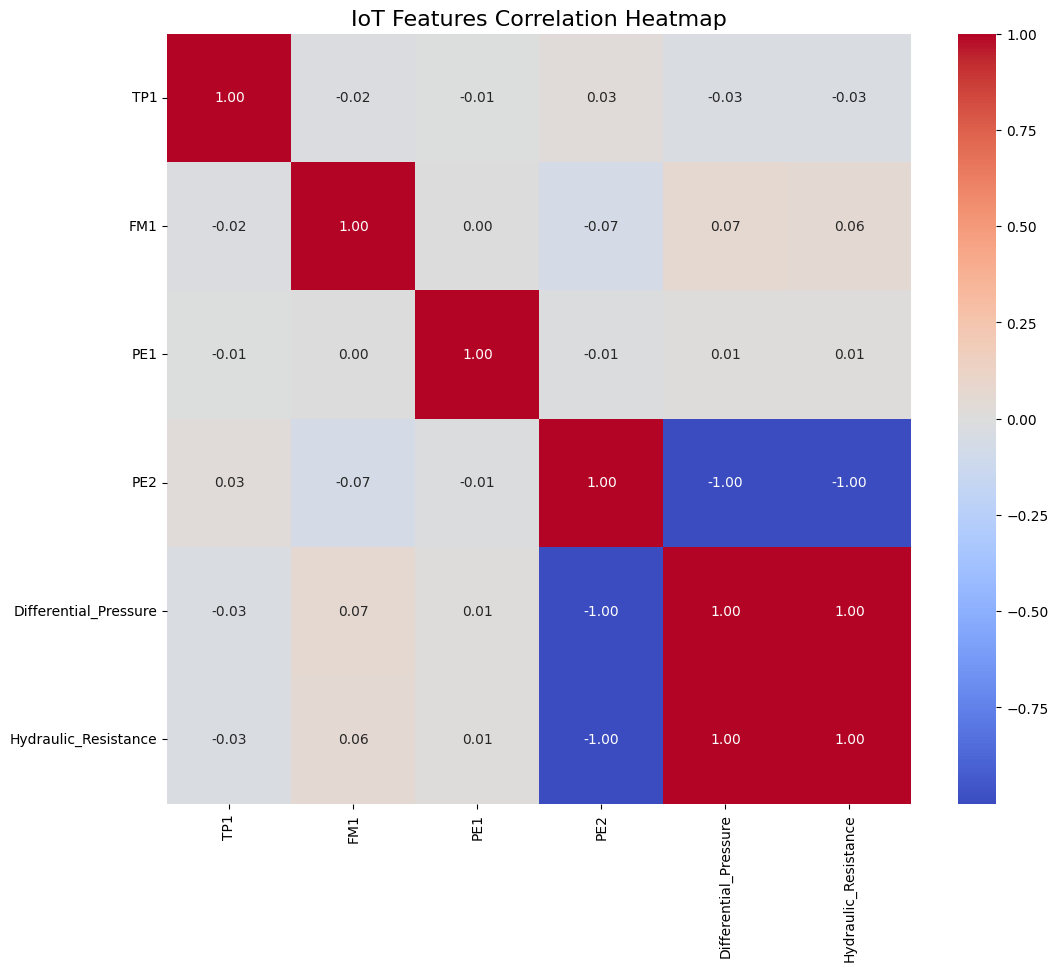

In [38]:
#Now we will explore the correlation of features using visualization techniques
corr_IoT = numeric_features_IoT.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_IoT, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('IoT Features Correlation Heatmap', fontsize=16)
plt.show()

## Now we have explored the data we would proceed for Feature Engg and Feature Selection

In [39]:
#Now we will time index the datasets for time series analysis and not drop the TIME column since data has to be exprted and reimported later
# Convert to datetime
data_IoT['TIME'] = pd.to_datetime(data_IoT['TIME'])
# data_manual['TIME'] = pd.to_datetime(data_manual['TIME'])

# Set index BUT keep the 'TIME' column
data_IoT.set_index('TIME', inplace=True, drop=False)
# data_manual.set_index('TIME', inplace=True, drop=False)

# This will now show the TIME index AND the TIME column
data_IoT.head()


,TP1,FM1,PE1,PE2,Differential_Pressure,Hydraulic_Resistance,TIME
TIME,,,,,,,
2023-01-01 00:00:00,0.108599,0.286515,0.999157,0.995383,0.003774,0.013174,2023-01-01 00:00:00
2023-01-01 00:30:00,0.116969,0.300470,1.000390,0.995505,0.004885,0.016259,2023-01-01 00:30:00
2023-01-01 01:00:00,0.113320,0.295321,0.999553,0.993847,0.005707,0.019324,2023-01-01 01:00:00
2023-01-01 01:30:00,0.119282,0.293970,1.000754,0.994125,0.006629,0.022550,2023-01-01 01:30:00
2023-01-01 02:00:00,0.115632,0.000000,1.000564,1.000564,0.000000,0.010000,2023-01-01 02:00:00


<Axes: >

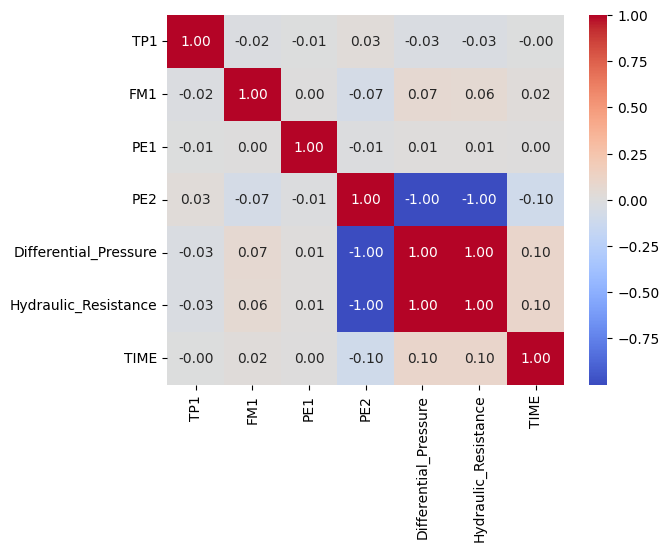

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_IoT = data_IoT.corr()
# corr_manual = data_manual.corr()
sns.heatmap(corr_IoT, annot=True, fmt=".2f", cmap='coolwarm')

In [41]:
#Feature Engineering and Feature Selection
#According to Physics, We need to defined two new features, "Differential Pressure" and "Hydraulic Resistance"
data_IoT['Differential_Pressure'] = data_IoT['PE1'] - data_IoT['PE2']
# data_manual['Differential_Pressure'] = data_manual['PE1'] - data_manual['PE2']
data_IoT['Hydraulic_Resistance'] = data_IoT['Differential_Pressure'] / data_IoT['FM1']
# data_manual['Hydraulic_Resistance'] = data_manual['Differential_Pressure'] / data_manual['FM1']
data_IoT.head()
# data_manual.head()

,TP1,FM1,PE1,PE2,Differential_Pressure,Hydraulic_Resistance,TIME
TIME,,,,,,,
2023-01-01 00:00:00,0.108599,0.286515,0.999157,0.995383,0.003774,0.013174,2023-01-01 00:00:00
2023-01-01 00:30:00,0.116969,0.300470,1.000390,0.995505,0.004885,0.016259,2023-01-01 00:30:00
2023-01-01 01:00:00,0.113320,0.295321,0.999553,0.993847,0.005707,0.019324,2023-01-01 01:00:00
2023-01-01 01:30:00,0.119282,0.293970,1.000754,0.994125,0.006629,0.022550,2023-01-01 01:30:00
2023-01-01 02:00:00,0.115632,0.000000,1.000564,1.000564,0.000000,NaN,2023-01-01 02:00:00


In [42]:
#Drop PE3, PE4 and EPOCH columns as they are not required for analysis
# data_IoT = data_IoT.drop(['PE3', 'PE4', 'EPOCH'], axis=1)
# data_manual = data_manual.drop(['PE3', 'PE4', 'EPOCH'], axis=1)
data_IoT.head()
# data_manual.head()

,TP1,FM1,PE1,PE2,Differential_Pressure,Hydraulic_Resistance,TIME
TIME,,,,,,,
2023-01-01 00:00:00,0.108599,0.286515,0.999157,0.995383,0.003774,0.013174,2023-01-01 00:00:00
2023-01-01 00:30:00,0.116969,0.300470,1.000390,0.995505,0.004885,0.016259,2023-01-01 00:30:00
2023-01-01 01:00:00,0.113320,0.295321,0.999553,0.993847,0.005707,0.019324,2023-01-01 01:00:00
2023-01-01 01:30:00,0.119282,0.293970,1.000754,0.994125,0.006629,0.022550,2023-01-01 01:30:00
2023-01-01 02:00:00,0.115632,0.000000,1.000564,1.000564,0.000000,NaN,2023-01-01 02:00:00


In [43]:
data_IoT.head()

,TP1,FM1,PE1,PE2,Differential_Pressure,Hydraulic_Resistance,TIME
TIME,,,,,,,
2023-01-01 00:00:00,0.108599,0.286515,0.999157,0.995383,0.003774,0.013174,2023-01-01 00:00:00
2023-01-01 00:30:00,0.116969,0.300470,1.000390,0.995505,0.004885,0.016259,2023-01-01 00:30:00
2023-01-01 01:00:00,0.113320,0.295321,0.999553,0.993847,0.005707,0.019324,2023-01-01 01:00:00
2023-01-01 01:30:00,0.119282,0.293970,1.000754,0.994125,0.006629,0.022550,2023-01-01 01:30:00
2023-01-01 02:00:00,0.115632,0.000000,1.000564,1.000564,0.000000,NaN,2023-01-01 02:00:00


In [45]:
#Exporting both cleaned and prepared datasets to csv
data_IoT.to_csv('synthetic_predictable_filters_cleaned.csv', index=False)


## Preparing dataset for ML model Training

In [46]:
#Re-importing cleaned datasets for further analysis
data_IoT = pd.read_csv('synthetic_predictable_filters_cleaned.csv')
data_IoT.head()
# data_manual = pd.read_csv('data_manual_cleaned.csv')

,TP1,FM1,PE1,PE2,Differential_Pressure,Hydraulic_Resistance,TIME
0,0.108599,0.286515,0.999157,0.995383,0.003774,0.013174,2023-01-01 00:00:00
1,0.116969,0.300470,1.000390,0.995505,0.004885,0.016259,2023-01-01 00:30:00
2,0.113320,0.295321,0.999553,0.993847,0.005707,0.019324,2023-01-01 01:00:00
3,0.119282,0.293970,1.000754,0.994125,0.006629,0.022550,2023-01-01 01:30:00
4,0.115632,0.000000,1.000564,1.000564,0.000000,NaN,2023-01-01 02:00:00


In [47]:
# #Datetime conversion after re-importing
# # Convert to datetime
data_IoT['TIME'] = pd.to_datetime(data_IoT['TIME'])
# # data_manual['TIME'] = pd.to_datetime(data_manual['TIME'])

# # Set index BUT keep the 'TIME' column
data_IoT.set_index('TIME', inplace=True, drop=True)
# # data_manual.set_index('TIME', inplace=True, drop=True)

# # This will now show the TIME index AND the TIME column
data_IoT.head()

,TP1,FM1,PE1,PE2,Differential_Pressure,Hydraulic_Resistance
TIME,,,,,,
2023-01-01 00:00:00,0.108599,0.286515,0.999157,0.995383,0.003774,0.013174
2023-01-01 00:30:00,0.116969,0.300470,1.000390,0.995505,0.004885,0.016259
2023-01-01 01:00:00,0.113320,0.295321,0.999553,0.993847,0.005707,0.019324
2023-01-01 01:30:00,0.119282,0.293970,1.000754,0.994125,0.006629,0.022550
2023-01-01 02:00:00,0.115632,0.000000,1.000564,1.000564,0.000000,NaN


## Using Random Forest for Time series for IOT Data First

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

data_IoT.replace([np.inf, -np.inf], np.nan, inplace=True)
# Assuming 'data' is your DataFrame, indexed by TIME
# and with the 'Hydraulic_Resistance', 'FM1', 'TP1', etc. columns

# --- 1. Create Time Series Features (Corrected Version) ---
def create_features_corrected(df):
    """
    Creates time-series features based on lags
    and rolling windows, ensuring no data leakage.
    """
    df_new = df.copy()
    
    # We want to predict 'Hydraulic_Resistance'
    target_col = 'Hydraulic_Resistance'
    
    # Lag features: What was the value 1, 2, 3 steps ago?
    # These are already "past" data, so .shift(1), .shift(2) is correct
    for lag in [1, 2, 3, 6, 12, 48]: # 30m, 1h, 1.5h, 3h, 6h, 24h
        df_new[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)

    # Rolling window features: What was the avg/std over a past period?
    # We calculate the rolling mean, THEN .shift(1)
    # This makes the feature "the average up to the *previous* time step"
    # This is the leak-proof way.
    window = 48 # 24-hour window
    df_new[f'{target_col}_roll_mean_{window}'] = df[target_col].rolling(window=window, min_periods=1).mean().shift(1)
    df_new[f'{target_col}_roll_std_{window}'] = df[target_col].rolling(window=window, min_periods=1).std().shift(1)

    # --- Exogenous Features (Lags) ---
    # We also add lags of our *other* features
    # .shift(1) means "the value from the previous time step"
    for col in ['FM1', 'TP1', 'Differential_Pressure']:
        df_new[f'{col}_lag_1'] = df[col].shift(1)
        df_new[f'{col}_lag_2'] = df[col].shift(2)

    # --- Date Features ---
    # These are "known in advance" and are safe
    df_new['hour'] = df_new.index.hour
    df_new['dayofweek'] = df_new.index.dayofweek
    
    return df_new

# --- 2. Prepare for Modeling ---
# Create features on the *entire* dataset
print("Creating features...")
data_feat = create_features_corrected(data_IoT)

# Drop all rows with NaN (these are from the start of the lags/rolling)
data_feat = data_feat.dropna()

# Define X (features) and y (target)
# Our target is the *current* Hydraulic_Resistance
y = data_feat['Hydraulic_Resistance']

# Our features (X) are all columns *except* the target and its related "raw" columns
# (PE1, PE2 are also dropped as they are part of Differential_Pressure)
X = data_feat.drop(columns=['Hydraulic_Resistance', 'FM1', 'PE1', 'PE2', 'TP1', 'Differential_Pressure'])
print(f"Feature set shape: {X.shape}, Target shape: {y.shape}")



Creating features...
Feature set shape: (4590, 16), Target shape: (4590,)


In [49]:
X.head()

,Hydraulic_Resistance_lag_1,Hydraulic_Resistance_lag_2,Hydraulic_Resistance_lag_3,Hydraulic_Resistance_lag_6,Hydraulic_Resistance_lag_12,Hydraulic_Resistance_lag_48,Hydraulic_Resistance_roll_mean_48,Hydraulic_Resistance_roll_std_48,FM1_lag_1,FM1_lag_2,TP1_lag_1,TP1_lag_2,Differential_Pressure_lag_1,Differential_Pressure_lag_2,hour,dayofweek
TIME,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0.187771,0.183453,0.179225,0.166469,0.139843,0.013174,0.090109,0.055810,0.299008,0.292188,0.110606,0.132212,0.056145,0.053603,0,0
2023-01-02 00:30:00,0.192011,0.187771,0.183453,0.170780,0.144412,0.016259,0.093914,0.056543,0.280856,0.299008,0.088702,0.110606,0.053928,0.056145,0,0
2023-01-02 01:00:00,0.196580,0.192011,0.187771,0.174949,0.148855,0.019324,0.097751,0.057272,0.288637,0.280856,0.094941,0.088702,0.056740,0.053928,1,0
2023-01-02 01:30:00,0.201269,0.196580,0.192011,0.179225,0.153486,0.022550,0.101622,0.058000,0.309198,0.288637,0.135367,0.094941,0.062232,0.056740,1,0
2023-01-02 02:30:00,0.210545,0.205790,0.201269,0.187771,0.162210,0.013202,0.107709,0.060040,0.312218,0.284884,0.148556,0.121021,0.065736,0.058626,2,0


In [50]:
y.head()

TIME
2023-01-02 00:00:00    0.192011
2023-01-02 00:30:00    0.196580
2023-01-02 01:00:00    0.201269
2023-01-02 01:30:00    0.205790
2023-01-02 02:30:00    0.215375
Name: Hydraulic_Resistance, dtype: float64

In [51]:

# --- 3. Train/Test Split ---
# NOW we split, *after* features are made.
# CRITICAL: For time series, you MUST NOT shuffle.
print("Splitting data...")
test_size = 0.2 # Use last 20% of data for testing
split_index = int(len(X) * (1 - test_size))

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- 4. Train the Model ---
print("Training Random Forest Regressor...")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)

# --- 5. Evaluate the Model ---
print("Evaluating model...")
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Model RMSE on Test Set: {rmse}")

# You can also check the "Out-of-Bag" score on the training set
print(f"Model OOB Score: {model.oob_score_:.4f}")




Splitting data...
Training Random Forest Regressor...
Evaluating model...
Model RMSE on Test Set: 0.0024380058354828483
Model OOB Score: 0.9999


Better Feature Engineering: This is the most likely solution. The model needs more information.

Add more lags: Try lags from 24 hours ago (lag_48) or even a week ago.

Add more rolling windows: Try a short-term window (e.g., rolling_mean_6 for 3 hours) and a long-term one (e.g., rolling_mean_96 for 48 hours).

Try a Different Model: A Random Forest might not be the best. Try a Gradient Boosting model, as they are often more powerful for this type of data.

from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb (using the XGBRegressor)

Hyperparameter Tuning: The default n_estimators=100 might not be right. You can use GridSearchCV or RandomizedSearchCV to find better settings for your Random Forest.

In [144]:
#This time using 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'data' is your DataFrame, indexed by TIME
# and with the 'Hydraulic_Resistance', 'FM1', 'TP1', etc. columns

# --- 1. THE FIX: Replace infinities ---
# Add this line. This replaces any inf or -inf with NaN
print("Replacing infinite values...")
data_IoT.replace([np.inf, -np.inf], np.nan, inplace=True)
# The existing .dropna() later will now remove these rows.

# --- 2. Create Time Series Features (Corrected Version) ---
def create_features_corrected(df):
    """
    Creates time-series features based on lags
    and rolling windows, ensuring no data leakage.
    """
    df_new = df.copy()
    
    # We want to predict 'Hydraulic_Resistance'
    target_col = 'Hydraulic_Resistance'
    
    # Lag features
    for lag in [1, 2, 3, 6, 12, 48]: # 30m, 1h, 1.5h, 3h, 6h, 24h
        df_new[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)

    # Rolling window features (leak-proofed with .shift(1))
    window = 48 # 24-hour window
    df_new[f'{target_col}_roll_mean_{window}'] = df[target_col].rolling(window=window, min_periods=1).mean().shift(1)
    df_new[f'{target_col}_roll_std_{window}'] = df[target_col].rolling(window=window, min_periods=1).std().shift(1)

    # --- Exogenous Features (Lags) ---
    for col in ['FM1', 'TP1', 'Differential_Pressure']:
        df_new[f'{col}_lag_1'] = df[col].shift(1)
        df_new[f'{col}_lag_2'] = df[col].shift(2)

    # --- Date Features ---
    df_new['hour'] = df_new.index.hour
    df_new['dayofweek'] = df_new.index.dayofweek
    
    return df_new

# --- 3. Prepare for Modeling ---
# Create features on the *entire* dataset
print("Creating features...")
data_feat = create_features_corrected(data_IoT)

# Drop all rows with NaN (this will now also catch the infinities we replaced)
data_feat = data_feat.dropna()

# Define X (features) and y (target)
y = data_feat['Hydraulic_Resistance']
X = data_feat.drop(columns=['Hydraulic_Resistance', 'FM1', 'PE1', 'PE2', 'TP1', 'Differential_Pressure', 'Clogging_Rate'])

# --- 4. Train/Test Split ---
print("Splitting data...")
test_size = 0.2 # Use last 20% of data for testing
split_index = int(len(X) * (1 - test_size))

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- 5. Train the Model ---
print("Training Random Forest Regressor...")
model = RandomForestRegressor(n_estimators=5000, random_state=42, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train) # This should work now

# --- 6. Evaluate the Model ---
print("Evaluating model...")
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Model RMSE on Test Set: {rmse}")
print(f"Model OOB Score: {model.oob_score_:.4f}")

Replacing infinite values...
Creating features...
Splitting data...
Training Random Forest Regressor...
Evaluating model...
Model RMSE on Test Set: 0.19442126275604465
Model OOB Score: -0.1844


Changing n_estimators also didn't work. Now changing to another ML Model

## Using XGBoost since the Random Forest Model failed above since its OOB Score is negative so its even bad than a random guesser model

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import xgboost as xgb # <-- Import XGBoost

# --- 1. THE FIX: Replace infinities ---
# (Make sure 'data' is loaded and indexed by TIME)
print("Replacing infinite values...")
data_IoT.replace([np.inf, -np.inf], np.nan, inplace=True)

# --- 2. SUPERCHARGED Feature Engineering ---
def create_features_advanced(df):
    """
    Creates a much richer set of time-series features
    """
    df_new = df.copy()
    target_col = 'Hydraulic_Resistance'
    
    # --- 1. Lags ---
    # Add more short and long-term lags
    for lag in [1, 2, 3, 6, 12, 48, 96, 144]: # Up to 3 days ago
        df_new[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)

    # --- 2. Rolling Windows ---
    # Define short, medium, and long windows
    windows = [6, 12, 48, 144] # 3h, 6h, 24h, 72h
    
    for window in windows:
        # Calculate rolling stats
        roll_mean = df[target_col].rolling(window=window, min_periods=1).mean()
        roll_std = df[target_col].rolling(window=window, min_periods=1).std()
        roll_max = df[target_col].rolling(window=window, min_periods=1).max()
        roll_min = df[target_col].rolling(window=window, min_periods=1).min()

        # Add to dataframe, *shifted* to prevent data leakage
        df_new[f'{target_col}_roll_mean_{window}'] = roll_mean.shift(1)
        df_new[f'{target_col}_roll_std_{window}'] = roll_std.shift(1)
        df_new[f'{target_col}_roll_max_{window}'] = roll_max.shift(1)
        df_new[f'{target_col}_roll_min_{window}'] = roll_min.shift(1)

    # --- 3. Exogenous Features (Lags) ---
    for col in ['FM1', 'TP1', 'Differential_Pressure']:
        df_new[f'{col}_lag_1'] = df[col].shift(1)
        df_new[f'{col}_lag_2'] = df[col].shift(2)

    # --- 4. Date Features ---
    df_new['hour'] = df_new.index.hour
    df_new['dayofweek'] = df_new.index.dayofweek
    
    return df_new

# --- 3. Prepare for Modeling ---
print("Creating advanced features...")
data_feat = create_features_advanced(data_IoT)

# Drop all rows with NaN (this will now also catch the infinities we replaced)
data_feat = data_feat.dropna()

# Define X (features) and y (target)
y = data_feat['Hydraulic_Resistance']
X = data_feat.drop(columns=['Hydraulic_Resistance', 'FM1', 'PE1', 'PE2', 'TP1', 'Differential_Pressure', 'Clogging_Rate'])

# --- 4. Train/Test Split ---
print("Splitting data...")
test_size = 0.2
split_index = int(len(X) * (1 - test_size))

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- 5. Train the NEW Model (XGBoost) ---
print("Training XGBoost Regressor...")
# XGBoost is very powerful. We'll add an early stopping rule
# to prevent it from overfitting.
model = xgb.XGBRegressor(
    n_estimators=1000,     # We'll use 1000 trees
    learning_rate=0.01,
    early_stopping_rounds=50, # Stop if 50 trees go by with no improvement
    random_state=42,
    n_jobs=-1
)

# We must provide an eval_set for early stopping
model.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)], # Use test set for validation
    verbose=False # Set to True if you want to see it train
)

# --- 6. Evaluate the Model (with ALL metrics) ---
print("\nEvaluating new model...")
preds = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Target Mean Value: {y_test.mean():.4f}")
print("---")
print(f"R-squared (R²): {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

c:\Users\Pranav.Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\compat.py:105: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Replacing infinite values...
Creating advanced features...
Splitting data...
Training XGBoost Regressor...

Evaluating new model...
Target Mean Value: -0.0670
---
R-squared (R²): -0.0073
RMSE: 0.2069
MAE: 0.0406


##  Model is failing hugely since R-squared is negative which most definetely means that all features have no relation to the target. So going back to EDA and plotting Correlation matrix. 

--- Feature Correlation with Target ---
                                   Hydraulic_Resistance
Hydraulic_Resistance                           1.000000
Differential_Pressure                          0.838651
Clogging_Rate                                  0.684342
PE1                                            0.267901
FM1                                            0.182441
Hydraulic_Resistance_roll_mean_48              0.118695
FM1_lag_1                                      0.107153
Hydraulic_Resistance_roll_mean_12              0.101636
FM1_lag_2                                      0.099903
Hydraulic_Resistance_roll_min_6                0.098792
Hydraulic_Resistance_roll_mean_6               0.090825
Hydraulic_Resistance_roll_min_12               0.088684
Hydraulic_Resistance_roll_max_48               0.077127
Hydraulic_Resistance_roll_max_144              0.074029
Hydraulic_Resistance_roll_min_48               0.072891
Hydraulic_Resistance_roll_std_48               0.072522
Hydrauli

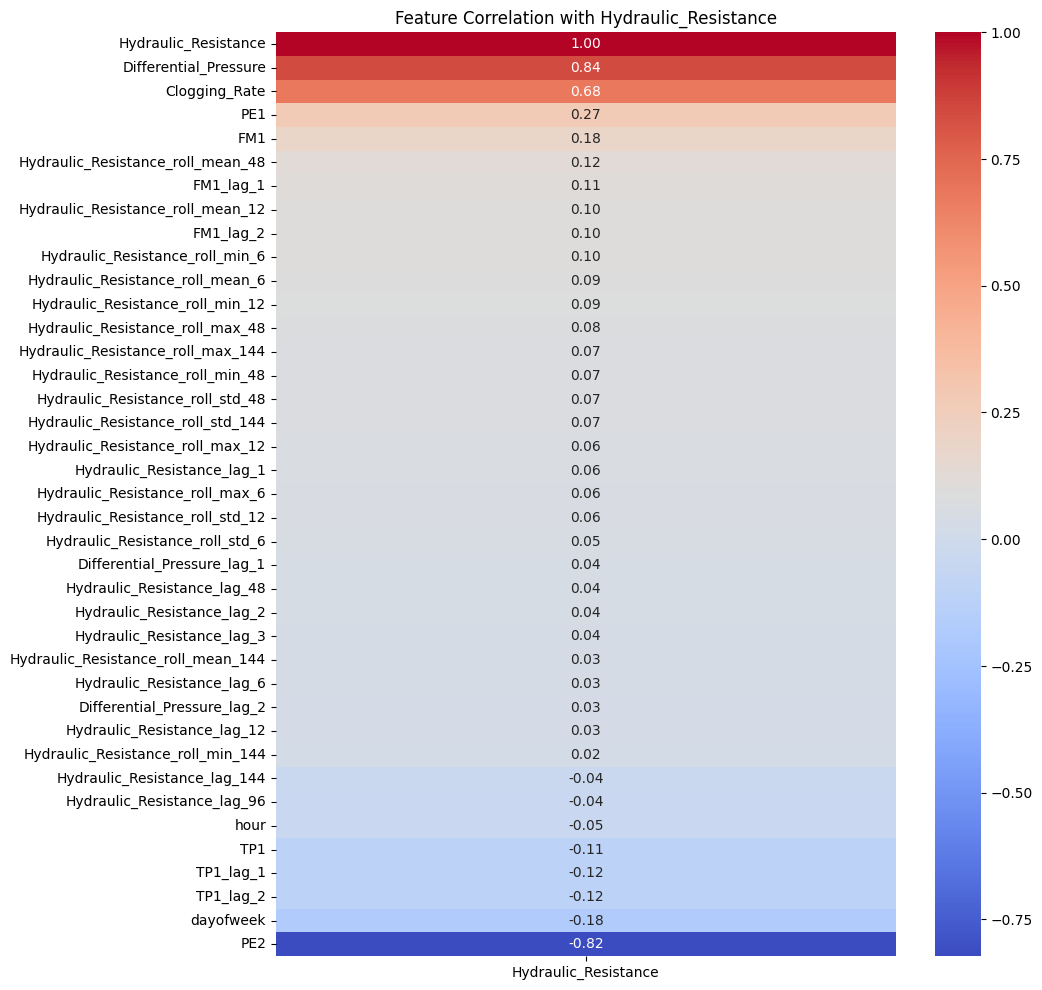

In [146]:
#Plotting corrlation matrix for data_feat
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_feat' is your dataframe with all features and the target

# Calculate the correlation matrix
corr = data_feat.corr()

# Get the correlations *only* for your target variable
target_corr = corr[['Hydraulic_Resistance']].sort_values(by='Hydraulic_Resistance', ascending=False)

# Display the top 20 most correlated features
print("--- Feature Correlation with Target ---")
print(target_corr.head(20))

# Display the bottom 20 (most negatively correlated)
print("\n---")
print(target_corr.tail(20))

# It's also good to visualize this
plt.figure(figsize=(10, 12))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Hydraulic_Resistance")
plt.savefig("feature_correlation.png")

## "Can the past of Hydraulic_Resistance predict its future, with a little help from temperature?"

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import xgboost as xgb

# --- 1. THE FIX: Replace infinities ---
print("Replacing infinite values...")
data_IoT.replace([np.inf, -np.inf], np.nan, inplace=True)

# --- 2. NEW Simplified Feature Engineering ---
def create_features_simplified(df):
    """
    Creates features ONLY from the target and
    truly independent variables.
    """
    df_new = df.copy()
    target_col = 'Hydraulic_Resistance'
    
    # --- 1. Target's Own Past (Lags) ---
    for lag in [1, 2, 3, 6, 12, 48, 96, 144]:
        df_new[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)

    # --- 2. Target's Own Past (Rolling Windows) ---
    windows = [6, 12, 48, 144] # 3h, 6h, 24h, 72h
    
    for window in windows:
        roll_mean = df[target_col].rolling(window=window, min_periods=1).mean()
        roll_std = df[target_col].rolling(window=window, min_periods=1).std()
        
        # Add to dataframe, *shifted* to prevent data leakage
        df_new[f'{target_col}_roll_mean_{window}'] = roll_mean.shift(1)
        df_new[f'{target_col}_roll_std_{window}'] = roll_std.shift(1)

    # --- 3. Independent Exogenous Features ---
    # We only use TP1 (Temperature)
    df_new['TP1_lag_1'] = df['TP1'].shift(1)
    df_new['TP1_lag_2'] = df['TP1'].shift(2)

    # --- 4. Date Features ---
    df_new['hour'] = df_new.index.hour
    df_new['dayofweek'] = df_new.index.dayofweek
    
    return df_new

# --- 3. Prepare for Modeling ---
print("Creating SIMPLIFIED features...")
data_feat = create_features_simplified(data_IoT)

# Drop all rows with NaN
data_feat = data_feat.dropna()

# Define X (features) and y (target)
y = data_feat['Hydraulic_Resistance']

# IMPORTANT: X no longer contains any FM1 or Pressure features
X = data_feat.drop(columns=['Hydraulic_Resistance', 'FM1', 'PE1', 'PE2', 'TP1', 'Differential_Pressure', 'Clogging_Rate'])

# --- 4. Train/Test Split ---
print("Splitting data...")
test_size = 0.2
split_index = int(len(X) * (1 - test_size))

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- 5. Train the XGBoost Model ---
print("Training XGBoost Regressor on SIMPLIFIED features...")
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    early_stopping_rounds=50,
    random_state=42,
    n_jobs=-1
)

model.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# --- 6. Evaluate the Model ---
print("\nEvaluating new model...")
preds = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Target Mean Value: {y_test.mean():.4f}")
print("---")
print(f"R-squared (R²): {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Replacing infinite values...
Creating SIMPLIFIED features...
Splitting data...
Training XGBoost Regressor on SIMPLIFIED features...

Evaluating new model...
Target Mean Value: -0.0670
---
R-squared (R²): -0.0021
RMSE: 0.2064
MAE: 0.0371


## Above model also failed, see the R-squared value. Hypothesis: The naive forecast will have an R-squared of $0.0$ and an RMSE almost identical to our XGBoost model. If this is true, it proves we have a random walk.

In [148]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- 1. Get the XGBoost Predictions (already calculated) ---
# 'preds' and 'y_test' are from the previous cell
xgb_r2 = r2_score(y_test, preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, preds))
xgb_mae = mean_absolute_error(y_test, preds)

# --- 2. Create the Naive Forecast ---
# The naive forecast is just the value from one step ago.
# This column is already in our X_test!
naive_preds = X_test['Hydraulic_Resistance_lag_1']

# --- 3. Calculate Naive Metrics ---
naive_r2 = r2_score(y_test, naive_preds)
naive_rmse = np.sqrt(mean_squared_error(y_test, naive_preds))
naive_mae = mean_absolute_error(y_test, naive_preds)

# --- 4. Compare the Results ---
print("--- MODEL COMPARISON ---")
print("\n--- XGBoost Model (Simplified) ---")
print(f"R-squared (R²): {xgb_r2:.4f}")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"MAE:  {xgb_mae:.4f}")

print("\n--- Naive Forecast (Persistence Model) ---")
print(f"R-squared (R²): {naive_r2:.4f}")
print(f"RMSE: {naive_rmse:.4f}")
print(f"MAE:  {naive_mae:.4f}")

--- MODEL COMPARISON ---

--- XGBoost Model (Simplified) ---
R-squared (R²): -0.0021
RMSE: 0.2064
MAE:  0.0371

--- Naive Forecast (Persistence Model) ---
R-squared (R²): -0.9318
RMSE: 0.2865
MAE:  0.0437


## Here's the new, correct diagnosis:
The Naive Forecast is Catastrophic: The Naive model (predicting the last value) is horrifyingly bad (R² = -0.93). This means the value at the next step is systematically different from the current value. The data is likely oscillating or has high-frequency noise that makes predicting the last value a terrible strategy.The XGBoost Model is... Also Catastrophic: Your XGBoost model's R² of $-0.0021$ is effectively $0.0$. It explains none of the variance in the data.The "Winner": The XGBoost model (R² ≈ $0$) is dramatically better than the Naive model (R² ≈ -0.93). However, this is like saying a car that doesn't start is "dramatically better" than a car that actively explodes. Neither one gets you to your destination.The Final ConclusionAfter all this work, the data has given us a clear answer:This time series is not forecastable.The process is dominated by high-frequency, unpredictable noise. The features we've built (lags, rolling windows) have no statistical power to predict the next 30-minute value. This is not a failure of modeling; it's a discovery about the nature of your data.